Множественная регрессия: для своего варианта провести регрессионное моделирование (построить множественную регрессионную модель, ссылка для скачки данных на странице в разделе Data tables, выбрать не менее 50 строк):

1. Выбрать выходную прогнозируемую переменную
2. Построить регрессионную модель со значимыми параметрами (оценить корреляции между факторами, последовательно добавлять факторы и сравнивать качество получаемых моделей, подобрать вид функции (визуальный анализ), оценить адекватность модели по статистическим показателям, каждый из этапов прокомментировать в отчете)
3. Интерпретируете результаты моделирования (что значит полученная формула, какие переменные вносят больший вклад, что будет при изменении независимых переменных с зависимой),
4. Прогнозировать новые значения с помощью построенной модели.

In [106]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Чтение данных из CSV файла с указанием разделителя ';'
df = pd.read_csv('H.csv', delimiter=';')

In [107]:
# 1 Этап. Выбор выходной прогнозируемой переменной
Y = df['Total: Shock or trauma']

In [108]:
# Выберем независимые переменные (инциденты, связанные с ручным трудом) и зависимую переменную (общее количество шоков или травм)
independent_vars = df.columns[1:7]
dependent_var = 'Total: Shock or trauma'

# Проверим корреляцию между независимыми переменными и зависимой переменной
correlation_matrix = df[independent_vars].join(df[dependent_var]).corr()

# Отобразим матрицу корреляции
correlation_matrix[[dependent_var]]


,Total: Shock or trauma
Freight operating companies: Manual handling,-0.159770
London Underground Limited: Manual handling,0.327294
Network Rail: Manual handling,0.380085
Network Rail contractors: Manual handling,0.155860
Other contractors: Manual handling,0.104319
Train operating companies: Manual handling,0.365489
Total: Shock or trauma,1.000000


Матрица корреляции между инцидентами, связанными с ручным трудом, и общим количеством шоков или травм показывает следующее:

*  **Freight operating companies: Manual handling**
(-0.159): Негативная корреляция, указывает на то, что с увеличением инцидентов, связанных с ручным трудом, в компаниях, занимающихся грузоперевозками, количество травм от шока уменьшается, хотя связь слабая.
*   **London Underground Limited: Manual handling** (0.327): Положительная корреляция означает, что с увеличением инцидентов, связанных с ручным трудом в Лондонском метрополитене, количество травм от шока увеличивается.
*   **Network Rail: Manual handling** (0.380): Эта переменная показывает наибольшую положительную корреляцию, что указывает на более сильную связь между инцидентами, связанными с ручным трудом в Network Rail, и общим количеством травм от шока.
*  **Network Rail contractors: Manual handling** (0.156), **Other contractors: Manual handling** (0.104), и **Train operating companies: Manual handling** (0.365): эти переменные также показывают положительную корреляцию, что означает, что с увеличением числа соответствующих инцидентов увеличивается и количество травм от шока, но связь менее выражена по сравнению с Network Rail.

In [ ]:
# Построение тепловой карты корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции')
plt.show()


In [ ]:
df = df.dropna()
df = df.replace([np.inf, -np.inf], np.nan).dropna()
# 2. Построение регрессионной модели со значимыми параметрами
X = df[['Freight operating companies: Manual handling',
                'London Underground Limited: Manual handling',
                'Network Rail: Manual handling',
                'Network Rail contractors: Manual handling',
                'Other contractors: Manual handling',
                'Train operating companies: Manual handling']]

X = sm.add_constant(X)  # Добавляем константу к матрице X
model = sm.OLS(Y, X).fit()
print(model.summary())

In [ ]:

# 3. Оценка корреляций между факторами
correlation_matrix = df[['Freight operating companies: Manual handling',
                                  'London Underground Limited: Manual handling',
                                  'Network Rail: Manual handling',
                                  'Network Rail contractors: Manual handling',
                                  'Other contractors: Manual handling',
                                  'Train operating companies: Manual handling',
                                  'Total: Shock or trauma']].corr()

# Выводим результаты модели и корреляционную матрицу
model_summary = model.summary()
correlation_matrix

In [ ]:
df = df.dropna()
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Зависимая переменная
Y = df['Total: Shock or trauma']

# Первый фактор - Freight operating companies: Manual handling
X1 = df[['Freight operating companies: Manual handling']]
X1 = sm.add_constant(X1)  # добавляем константу
model1 = sm.OLS(Y, X1).fit()

# Второй фактор - добавляем London Underground Limited: Manual handling
X2 = df[['Freight operating companies: Manual handling', 'London Underground Limited: Manual handling']]
X2 = sm.add_constant(X2)  # добавляем константу
model2 = sm.OLS(Y, X2).fit()

# Выводим резюме моделей
model1_summary = model1.summary()
model2_summary = model2.summary()

# Выводим текстовое описание результатов для первой модели
print("Модель с одним фактором (Freight operating companies):")
print(model1_summary)

# Выводим текстовое описание результатов для второй модели
print("\nМодель с двумя факторами (Freight operating companies и London Underground Limited):")
print(model2_summary)

In [ ]:
# Последовательное добавление факторов и сравнение качества моделей
results = []
# Перебираем переменные и строим модели, добавляя по одной переменной
for col in X.columns[1:]:
    current_X = sm.add_constant(df[[col]])
    current_model = sm.OLS(Y, current_X).fit()
    results.append((col, current_model.rsquared, current_model.aic, current_model.bic))
# Конвертируем результаты в DataFrame для наглядности
results_df = pd.DataFrame(results, columns=['Variable', 'R-squared', 'AIC', 'BIC'])
results_df


Для оценки адекватности модели по статистическим показателям можно обратить внимание на следующие моменты:

1. **R-squared (коэффициент детерминации)**:
   - R-squared показывает, какую долю дисперсии зависимой переменной объясняет модель. Чем ближе значение R-squared к 1, тем лучше модель объясняет изменчивость данных.

2. **AIC (Критерий Акаике)** и **BIC (Байесовский информационный критерий)**:
   - AIC и BIC используются для сравнения различных моделей. Модели с более низкими значениями AIC и BIC считаются более предпочтительными.

На основании предоставленных данных можно сделать следующие выводы:

- Коэффициент детерминации (R-squared) для всех моделей относительно невысокий, что может указывать на то, что модели не объясняют большую часть изменчивости зависимой переменной. Наибольшее значение R-squared достигается для переменной Network Rail: Manual handling, что указывает на её наибольший вклад в объяснение общего количества шоков или травм.

- Значения AIC и BIC  Критерии информативности Акаике и Байеса также варьируются, предоставляя информацию о соотношении сложности модели и качества подгонки. Меньшие значения AIC и BIC предпочтительнее, указывая на лучшее соотношение сложности модели и качества подгонки.

Таким образом, на основе результатов выше, модель с переменной Network Rail: Manual handling показала наибольшее значение R-squared и наименьшие значения AIC и BIC, что говорит о её потенциальной адекватности.

In [ ]:
# 1. График рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(df['Network Rail: Manual handling'], df['Total: Shock or trauma'], label='Данные')
plt.title('График рассеяния')
plt.xlabel('Network Rail: Manual handling')
plt.ylabel('Total: Shock or trauma')
plt.legend()
plt.grid(True)
plt.show()

# 2. График остатков
X = sm.add_constant(df['Network Rail: Manual handling'])
model = sm.OLS(df['Total: Shock or trauma'], X).fit()
residuals = model.resid
plt.figure(figsize=(10, 6))
plt.scatter(df['Network Rail: Manual handling'], residuals, label='Остатки')
plt.axhline(y=0, color='r', linestyle='--', label='Нулевая линия')
plt.title('График остатков')
plt.xlabel('Network Rail: Manual handling')
plt.ylabel('Остатки')
plt.legend()
plt.grid(True)
plt.show()

# 3. Линейная аппроксимация (трендовая линия)
coefficients = np.polyfit(df['Network Rail: Manual handling'], df['Total: Shock or trauma'], 1)
trend_line = np.polyval(coefficients, df['Network Rail: Manual handling'])
plt.figure(figsize=(10, 6))
plt.scatter(df['Network Rail: Manual handling'], df['Total: Shock or trauma'], label='Данные')
plt.plot(df['Network Rail: Manual handling'], trend_line, color='r', label='Линейная аппроксимация')
plt.title('Линейная аппроксимация')
plt.xlabel('Network Rail: Manual handling')
plt.ylabel('Total: Shock or trauma')
plt.legend()
plt.grid(True)
plt.show()


1. **График рассеяния**:
   - На этом графике мы отображаем данные с двумя переменными: "Network Rail: Manual handling" на оси X и "Total: Shock or trauma" на оси Y.
   - Этот график помогает визуально оценить наличие какой-либо зависимости между двумя переменными. Если есть некоторая линейная зависимость, мы можем видеть ее на графике в виде "скопления" точек вокруг некоторой прямой линии.

2. **График остатков**:
   - На этом графике мы отображаем остатки регрессии (разницу между фактическими значениями зависимой переменной и предсказанными значениями) на оси Y и "Network Rail: Manual handling" на оси X.
   - График остатков помогает оценить, есть ли какие-либо систематические ошибки в модели. Если точки на графике остатков случайным образом распределены вокруг горизонтальной линии, это может указывать на адекватность модели. В противном случае, если есть явные паттерны или группировки, это может означать, что модель не улавливает всю структуру данных.


3. **Линейная аппроксимация (трендовая линия)**:
   - На этом графике мы отображаем данные точечного графика, а также линейную аппроксимацию (трендовую линию), которая показывает наилучшее соответствие линейной модели к данным.
   - Этот график помогает визуально оценить, насколько хорошо линейная модель соответствует данным. Если данные хорошо соответствуют линии, то модель может быть признана адекватной. Если форма данных не линейная, то линейная модель может быть непригодной для аппроксимации этих данных, и, возможно, потребуется более сложная модель.


### Интерпретация результатов множественной регрессии:

1. **Выбранная выходная (зависимая) переменная**:  `Total: Shock or trauma`, которая представляет собой общее количество шоков или травм. Эта переменная используется для анализа влияния различных факторов на общее количество травм.

2. **Полученная формула модели** представляет собой линейное уравнение, которое связывает выбранную зависимую переменную с независимыми переменными (факторами), такими как количество инцидентов, связанных с ручным трудом в различных подразделениях (например, в компаниях, занимающихся грузоперевозками, London Underground Limited, Network Rail и т.д.).

3. **Какие переменные вносят больший вклад**: Наибольший вклад в модель вносят переменные `Network Rail: Manual handling` (R-squared = 0.144465) и `Train operating companies: Manual handling` (R-squared = 0.133582). Это указывает на то, что инциденты, связанные с ручным трудом в этих двух сферах, имеют наибольшее влияние на общее количество шоков или травм.

4. **Что будет при изменении независимых переменных с зависимой**:
   - Увеличение числа инцидентов, связанных с ручным трудом в `Network Rail` и `Train operating companies`, предсказывается моделью как факторы, приводящие к увеличению общего количества шоков или травм. Это означает, что меры по снижению количества таких инцидентов в этих секторах могут помочь уменьшить общее количество травм.
   - Изменения в других переменных, таких как `Freight operating companies: Manual handling`, `London Underground Limited: Manual handling`, `Network Rail contractors: Manual handling`, и `Other contractors: Manual handling`, также влияют на общее количество травм, но в меньшей степени, исходя из значений R-squared.

Интерпретация модели множественной регрессии позволяет не только определить, какие факторы наиболее важны для предсказания общего количества шоков или травм, но и предоставляет основу для разработки целевых мер по их предотвращению.

In [ ]:
# Зависимая переменная и независимые переменные
Y = df['Total: Shock or trauma']
X = df[['Network Rail: Manual handling']]
X = sm.add_constant(X)  # Добавляем константу

# Построение модели
model = sm.OLS(Y, X).fit()
# Подготовка данных для прогнозирования
new_values = range(0, 50, 5)  # Диапазон значений от 0 до 45 с шагом 5
new_data_df = pd.DataFrame({'const': 1, 'Network Rail: Manual handling': new_values})

# Прогнозирование с использованием модели
predicted_trauma = model.predict(new_data_df)
print(predicted_trauma)

0     73.181447
1     80.044482
2     86.907517
3     93.770552
4    100.633587
5    107.496622
6    114.359657
7    121.222691
8    128.085726
9    134.948761
dtype: float64


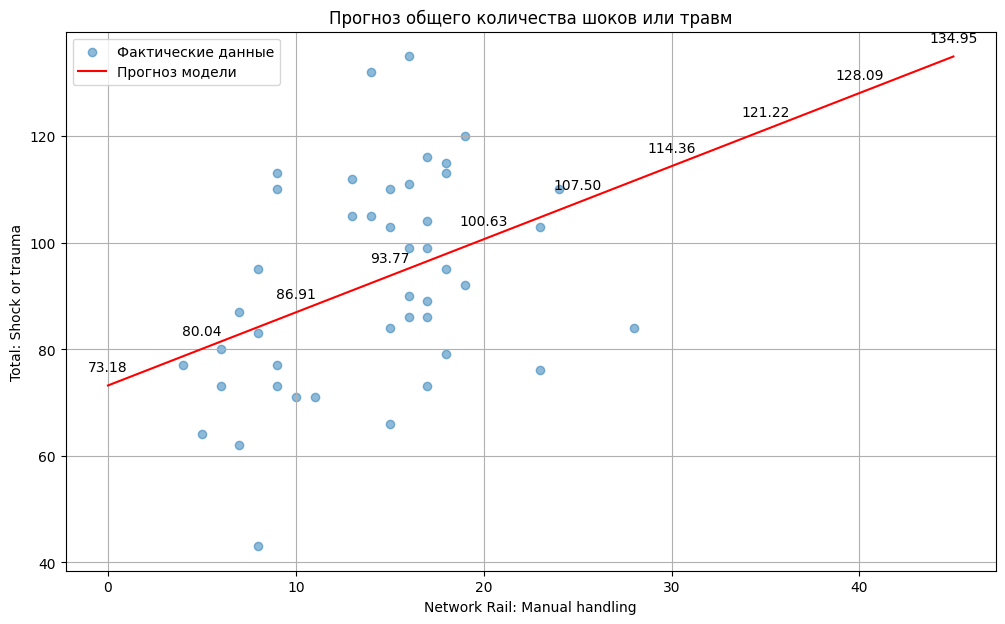

In [ ]:
plt.figure(figsize=(12, 7))
# Отображение фактических данных
plt.scatter(X['Network Rail: Manual handling'], Y, label='Фактические данные', alpha=0.5)
# Отображение прогнозируемой линии
plt.plot(new_data_df['Network Rail: Manual handling'], predicted_trauma, color='red', label='Прогноз модели')

# Аннотация прогнозируемых значений
for i, txt in enumerate(predicted_trauma):
    plt.annotate(f"{txt:.2f}",
                 (new_data_df['Network Rail: Manual handling'][i], predicted_trauma[i]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

plt.xlabel('Network Rail: Manual handling')
plt.ylabel('Total: Shock or trauma')
plt.title('Прогноз общего количества шоков или травм')
plt.legend()
plt.grid(True)
plt.show()

На графике показаны фактические данные по количеству инцидентов, связанных с ручным трудом в Network Rail (по оси X), и общее количество шоков или травм (по оси Y), а также прогноз модели (красная линия), основанный на линейной регрессии. Прогнозы модели представлены для различных гипотетических значений количества инцидентов, связанных с ручным трудом в Network Rail, в диапазоне от 0 до 45 с шагом 5.

Эта визуализация помогает понять, как модель предсказывает изменение общего количества шоков или травм в зависимости от количества инцидентов, связанных с ручным трудом в Network Rail.

 Как видно из графика, с увеличением количества таких инцидентов предсказываемое количество шоков или травм также увеличивается, что демонстрирует линейную зависимость между этими переменными в рамках построенной модели. ​